# 💡Challenge - Hardwork Pays Off

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Section 1: Load and Visualize Data
- Download
- Load data
- Visualise
- Normalization

#### Load

In [2]:
X = pd.read_csv('../data/Hardwork Pays Off/Train/Linear_X_Train.csv')
Y = pd.read_csv('../data/Hardwork Pays Off/Train/Linear_Y_Train.csv')

In [3]:
type(X), type(Y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [3]:
X = X.values
Y = Y.values

#### Normalise

In [5]:
# Normalisation - substract by mean and divide by standard deviation
u = X.mean()
std = X.std()
X = (X-u)/std

#### Visualize

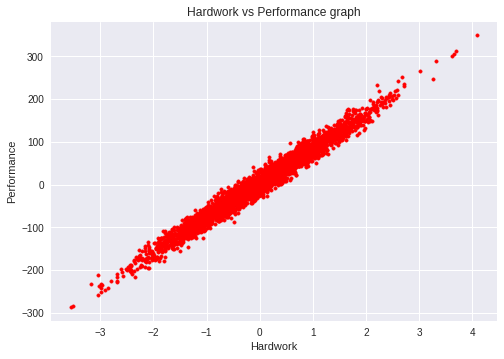

In [4]:
plt.style.use('seaborn')
plt.scatter(X,Y,color='red',marker='.')
plt.title('Hardwork vs Performance graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [15]:
X.shape, Y.shape

((3750, 1), (3750, 1))

## Section 2: Linear Regression

In [8]:
def hypothesis(theta, x):
    """ hypothesis function """
    # theta is a vector of size (n+1, 1)
    return theta[0] + theta[1] * x

def gradient(X, Y, theta):
    """ gradient function """
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypothesis(theta, X[i])
        x = X[i]
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x
    
    return grad / m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(theta, X[i])
        y = Y[i]
        total_error += (y_ - y) ** 2
    
    return total_error / m
    

def gradientDescent(X, Y, max_steps=100, learning_rate=0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        
        theta_list.append([theta[0], theta[1]])
        
        # Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
    
    return theta, error_list, theta_list

In [9]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1] * X
    return y_

def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    y_ = hypothesis(X, theta)
    
    grad[0] = np.sum(y_ - y)
    grad[1] = np.sum((y_ - y)*X)
    
    return grad/m

def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    return np.sum((y_ - y)**2) / m
    

def gradient_descent(X, y, learning_rate=0.1, max_steps=100):
    # Intialize theta to [0, 0]
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    # Update theta
    for i in range(max_steps):
        grad = gradient(X, y, theta)
        print(grad)
        error_list.append(error(X, y, theta))
        
        theta_list.append([theta[0], theta[1]])
        
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
    
    return theta

In [57]:
theta, error_list, theta_list = gradientDescent(X, Y)

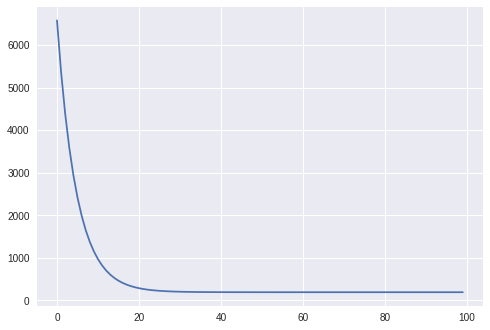

In [58]:
plt.plot(error_list)

In [55]:
theta_list

[(0.0, 0.0),
 (0.06838689680155917, 7.990573694249979),
 (0.12993510392296193, 15.182090019074964),
 (0.18532849033222448, 21.654454711417454),
 (0.23518253810056094, 27.479582934525695),
 (0.2800511810920642, 32.72219833532309),
 (0.3204329597844163, 37.44055219604077),
 (0.3567765606075334, 41.68707067068668),
 (0.3894858013483389, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.44541860301511615, 52.044329230348026),
 (0.4692636395151634, 54.83047000156319),
 (0.49072417236520605, 57.337996695656855),
 (0.5100386519302442, 59.594770720341145),
 (0.5274216835387785, 61.62586734255701),
 (0.5430664119864594, 63.45385430255129),
 (0.5571466675893723, 65.09904256654615),
 (0.5698188976319938, 66.57971200414151),
 (0.5812239046703533, 67.91231449797735),
 (0.5914884110048769, 69.11165674242959),
 (0.600726466705948, 70.19106476243661),
 (0.6090407168369121, 71.16253198044294),
 (0.6165235419547794, 72.03685247664862),
 (0.6232580845608604, 72.82374092323374),
 (0.6293

In [59]:
np.save('../data/Hardwork Pays Off/Train/Linear_Theta_Train.npy', theta_list)

## Section 3: Predictions and Best Line

In [39]:
y_ = hypothesis(theta, X)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


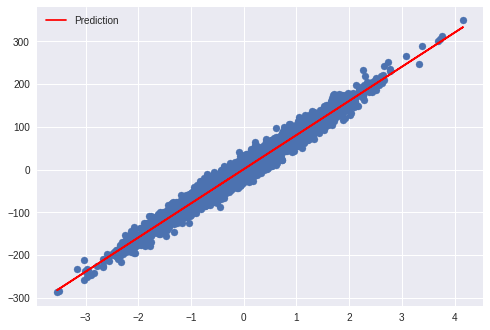

In [40]:
## Training data + Predictions
plt.scatter(X,Y)
plt.plot(X,y_,color = 'red',label='Prediction')
plt.legend()
plt.show()

In [20]:
# Loading the test data
X_test = pd.read_csv('../data/Hardwork Pays Off/Test/Linear_X_Test.csv').values
y_test_pred = hypothesis(theta,X_test)

In [21]:
y_test_pred.shape

(1250, 1)

In [22]:
y_test_pred

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [23]:
#creating submission file
df = pd.DataFrame(data = y_test_pred,columns=["y"])

In [24]:
df

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [25]:
df.to_csv('y_prediction_eg1.csv',index=False)

## Section 4 - Computing Score
Score : R2(R-Squared) or Coefficient of Determination

In [26]:
def r2_score(Y,Y_):
    #broadcasting will happen here
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [27]:
r2_score(Y,y_)

97.09612226971643

## Section 5 - Visualising Loss Function, Gradient Descent, Theta Updates

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [29]:
theta

array([ 0.6838508 , 79.90361453])

In [76]:
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)

In [77]:
print(T0.shape, T1.shape)

(80,) (80,)


In [78]:
T0, T1 = np.meshgrid(T0, T1)

In [80]:
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i, j] * X + T0[i, j]
        J[i,j] = np.sum((Y-y_)**2)/len(Y)

print(J.shape)
print(J)

(80, 80)
[[3438.6006145  3358.23287657 3279.86513863 ... 3102.28479343
  3175.91705549 3251.54931756]
 [3359.78914062 3279.42140268 3201.05366475 ... 3023.47331954
  3097.10558161 3172.73784367]
 [3282.97766673 3202.6099288  3124.24219086 ... 2946.66184566
  3020.29410772 3095.92636979]
 ...
 [3222.11712536 3141.74938742 3063.38164949 ... 2885.80130428
  2959.43356635 3035.06582841]
 [3297.30565147 3216.93791354 3138.5701756  ... 2960.9898304
  3034.62209246 3110.25435453]
 [3374.49417759 3294.12643965 3215.75870172 ... 3038.17835651
  3111.81061858 3187.44288064]]


In [67]:
theta_list = np.array(theta_list)
theta_list

array([[0.00000000e+00, 0.00000000e+00],
       [6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.293191

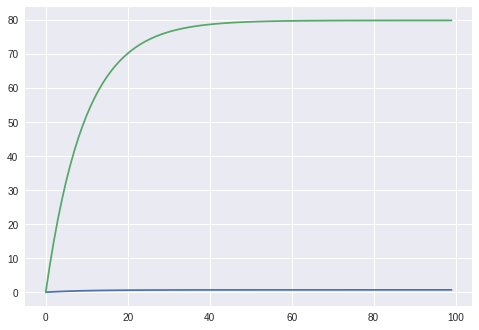

In [75]:
plt.plot(theta_list[:,0])
plt.plot(theta_list[:,1])
plt.show()

/tmp/ipykernel_233781/2572586106.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


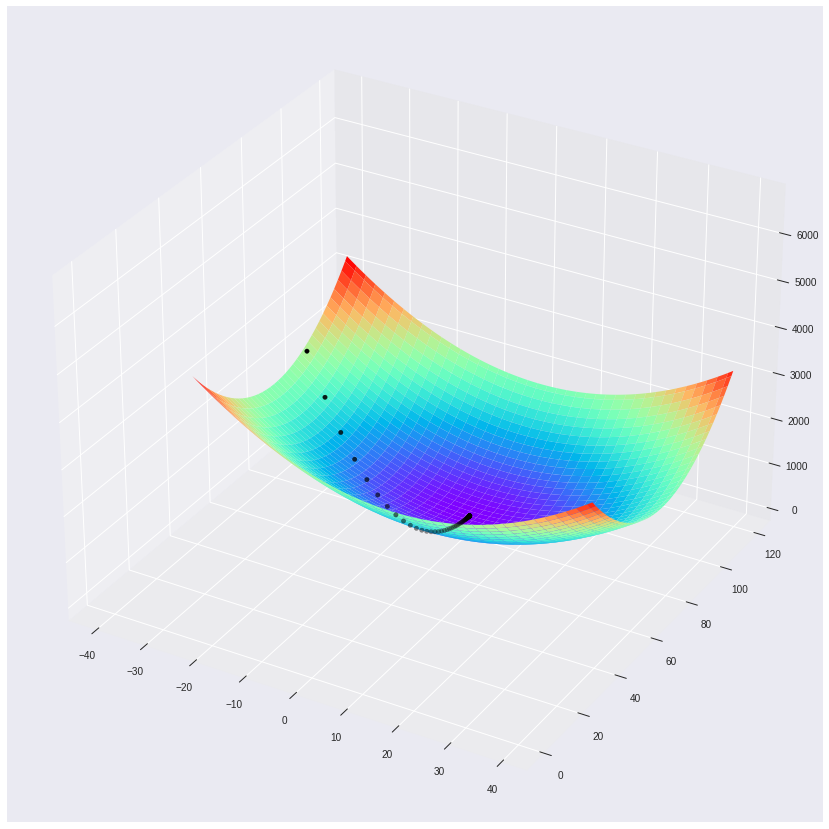

In [85]:
fig = plt.figure(figsize=(15,15))
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, c='black', marker='o')
plt.show()

/tmp/ipykernel_233781/4187468465.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


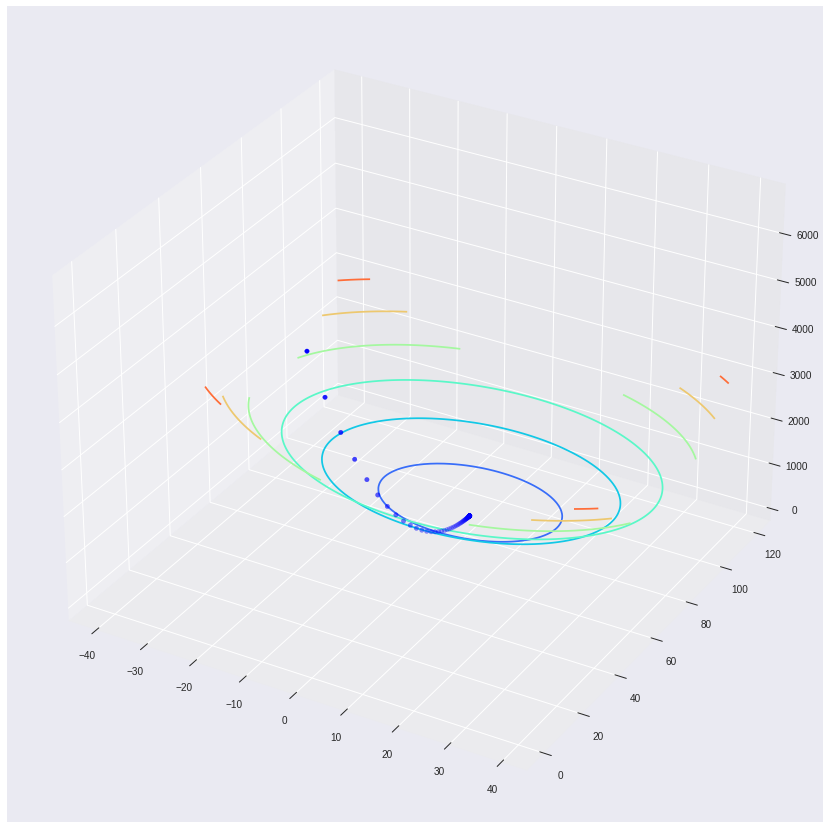

In [84]:
fig = plt.figure(figsize=(15,15))
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, c='b', marker='o')
plt.show()